In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import nltk
from nltk.tokenize import word_tokenize
#!pip install pytwitter
#from pytwitter import Api
import json
import math

!pip install emoji
from emoji import UNICODE_EMOJI

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#API key 
#API key secret 
#bearer token 
#Access token 
#Acces token secret

     |████████████████████████████████| 175 kB 2.1 MB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=63450a43b93e687960eea130505d1ab6ae285d77ff4f6a36ab95ebe8c315a8f2
  Stored in directory: /home/nickvanderlinden/.cache/pip/wheels/fa/7a/e9/22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji


In [9]:

file = open('#jinek.txt', 'r')
count = 0
tweets = []

while True:
    count += 1
 
    # Get next line from file
    line = file.readline()
 
    # if line is empty
    # end of file is reached
    if not line:
        break
    tweets.append(json.loads(line))#, encoding="utf-8"))
    
data2 = []
for i in range(len(tweets)):
    for j in range(len(tweets[i]["data"])):
        temp = []
        if tweets[i]["data"][0]["lang"] == 'nl':
            temp.append(tweets[i]["data"][0])
            user = [k for k in tweets[0]["includes"]["users"] 
                    if k["id"] == tweets[i]["data"][j]["author_id"]]
            temp.append(user)
            data2.append(temp)
len(data2)

161633

In [5]:
#expansions=[ "attachments.media_keys", 
#                               "author_id", 
#                               "entities.mentions.username",
#                               "in_reply_to_user_id", 
#                               "referenced_tweets.id", 
#                               "referenced_tweets.id.author_id"], 

#                          media_fields=["duration_ms", 
#                                        "height", 
#                                        "media_key", 
#                                        "preview_image_url", 
#                                        "type", 
#                                        "url", 
#                                        "width", 
#                                        "public_metrics", 
#                                        "alt_text"],

#                          tweet_fields=["attachments", 
#                                        "author_id",  
#                                        "conversation_id", 
#                                        "created_at", 
#                                        "entities", 
#                                        "id", 
#                                        "in_reply_to_user_id", 
#                                        "lang", 
#                                        "public_metrics", 
#                                        "possibly_sensitive", 
#                                        "referenced_tweets", 
#                                        "reply_settings", 
#                                        "source", 
#                                        "text", 
#                                        "withheld"],

#                          user_fields=["created_at", 
#                                       "description", 
#                                       "entities", 
#                                       "id", 
#                                       "location", 
#                                       "name", 
#                                       "pinned_tweet_id", 
#                                       "profile_image_url", 
#                                       "protected", 
#                                       "public_metrics", 
#                                       "url", 
#                                       "username", 
#                                       "verified", 
#                                       "withheld"],


In [10]:
data2[100]


[{'lang': 'nl',
  'entities': {'mentions': [{'start': 3,
     'end': 15,
     'username': 'EelcoHoecke',
     'id': '1174967016014303234'}],
   'hashtags': [{'start': 24, 'end': 36, 'tag': 'devooravond'},
    {'start': 123, 'end': 128, 'tag': 'woke'}]},
  'public_metrics': {'retweet_count': 19,
   'reply_count': 0,
   'like_count': 0,
   'quote_count': 0},
  'reply_settings': 'everyone',
  'conversation_id': '1504938640962637830',
  'created_at': '2022-03-18T21:51:47.000Z',
  'author_id': '2305592671',
  'referenced_tweets': [{'type': 'retweeted', 'id': '1504931135016554499'}],
  'source': 'Twitter Web App',
  'text': 'RT @EelcoHoecke: Exact. #devooravond was een topprogramma en Fidan Ekiz was top! Ze is gecanceld omdat ze te rechts was... #woke maakt meer…',
  'possibly_sensitive': False,
  'id': '1504938640962637830'},
 [{'description': 'Cynisch volger van Feyenoord, gek op Southern Rock, Country, Americana,The Boston Red Sox en The Rolling Stones, Keith Richards in het bijzonder.',


In [11]:
data2[0][0]["text"]

'RT @EelcoHoecke: Exact. #devooravond was een topprogramma en Fidan Ekiz was top! Ze is gecanceld omdat ze te rechts was... #woke maakt meer…'

In [23]:
import time 
#text = data2[x][0]["text"]
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

features = []
for x in range(0,len(data2)):
    temp = []
    if data2[x][1] != []:
        followers_count = data2[x][1][0]["public_metrics"]["followers_count"]
        temp.append(followers_count)
    else:
        temp.append(-1)

    if data2[x][1] != []:        
        tweetcount = data2[x][1][0]["public_metrics"]["tweet_count"]
        temp.append(tweetcount)
    else:
        temp.append(-1)

    qmarks = "?" in data2[x][0]["text"]
    temp.append(int(qmarks))

    if data2[x][1] != []:
        verified = data2[x][1][0]["verified"]
        temp.append(int(verified))    
    else:
        temp.append(-1)
        
    accountlife = time.mktime(time.localtime()) - time.mktime(time.strptime(data2[x][0]["created_at"], "%Y-%m-%dT%H:%M:%S.000Z"))
    temp.append(accountlife)

    if data2[x][1] != []:    
        ratio = (data2[x][1][0]["public_metrics"]["followers_count"]+1.0)/(data2[x][1][0]["public_metrics"]["following_count"]+2.0)
        temp.append(ratio)
    else:
        temp.append(999999)
        
    emark = "!" in data2[x][0]["text"]
    temp.append(int(emark))

    capitalletters = sum(1 for c in data2[x][0]["text"] if c.isupper())/sum(1 for c in data2[x][0])
    temp.append(capitalletters)

    retweet_count = data2[x][0]["public_metrics"]["retweet_count"]
    temp.append(retweet_count)
    
    hashtags = "#" in data2[x][0]["text"]
    temp.append(int(hashtags))
    
    if data2[x][1] != []:
        following = data2[x][1][0]["public_metrics"]["following_count"]
        temp.append(following)
    else:
        temp.append(-1)

    text_length = len(data2[x][0]["text"])
    temp.append(text_length)
    
    if data2[x][1] != []:    
        listed_count = data2[x][1][0]["public_metrics"]["listed_count"]
        temp.append(listed_count)
    else:
        temp.append(-1)

    emoticons = True in [s in UNICODE_EMOJI['en'] for s in data2[x][0]["text"]]
    temp.append(int(emoticons))
    
    reply_count = data2[x][0]["public_metrics"]["reply_count"]
    temp.append(reply_count)
    
    quote_count = data2[x][0]["public_metrics"]["quote_count"]
    temp.append(quote_count)
    
    like_count = data2[x][0]["public_metrics"]["like_count"]
    temp.append(like_count)
    
    if data2[x][1] != []:
        timeafterposting = time.mktime(time.strptime(data2[x][1][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z")) - time.mktime(time.strptime(data2[x][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z"))
        temp.append(timeafterposting)
    else:
        temp.append(999999)

    pos_tags = nltk.pos_tag(nltk.word_tokenize(data2[x][0]["text"]))
    temp.append(pos_tags)
    
    activity = tweetcount/accountlife
    temp.append(activity)

    if data2[x][1] != []:
        has_url = "profile_image_url" in data2[x][1][0]
        temp.append(int(has_url))
    else:
        temp.append(-1)
        
    fpp = True in [i in data2[x][0]["text"].lower() for i in ["me", "my", "i", "mine"]]
    temp.append(int(fpp))

    nsfw = data2[x][0]["possibly_sensitive"] 
    temp.append(int(nsfw))
    features.append(temp)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/nickvanderlinden/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nickvanderlinden/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [24]:
len(features)

161633

In [25]:
len(features[0])

23

In [26]:
[type(x) for x in features[0]]

[int,
 int,
 int,
 int,
 float,
 float,
 int,
 float,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 float,
 list,
 float,
 int,
 int,
 int]

Text(0, 0.5, 'frequency')

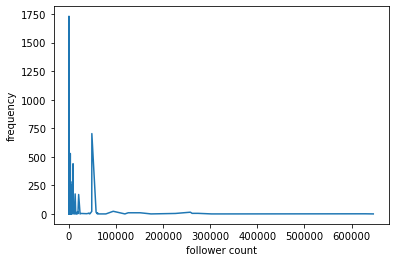

In [18]:
unique, counts = np.unique([x[0] for x in features], return_counts=True)
plt.plot(unique[1:-1], counts[1:-1])
plt.xlabel("follower count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

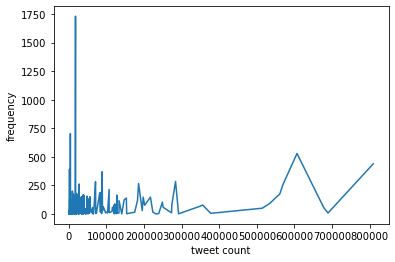

In [19]:
unique, counts = np.unique([x[1] for x in features], return_counts=True)
plt.plot(unique[1:-1], counts[1:-1])
plt.xlabel("tweet count")
plt.ylabel("frequency")

In [20]:
unique, counts = np.unique([x[2] for x in features], return_counts=True)
counts

#qmarks

array([140372,  21261], dtype=int64)

In [21]:
unique, counts = np.unique([x[3] for x in features], return_counts=True)
counts

#verified 

array([144719,  16806,    108], dtype=int64)

Text(0, 0.5, 'frequency')

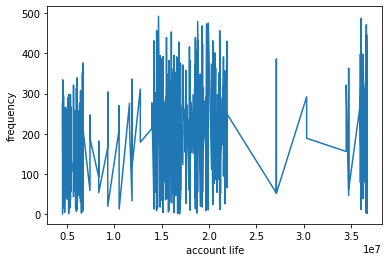

In [22]:
unique, counts = np.unique([x[4] for x in features], return_counts=True)
plt.plot(unique, counts)
plt.xlabel("account life")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

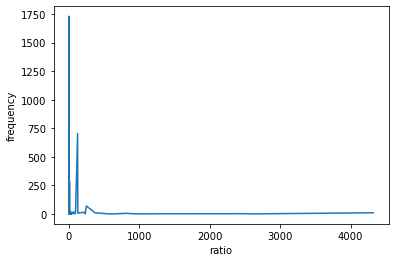

In [23]:
unique, counts = np.unique([x[5] for x in features], return_counts=True)
plt.plot(unique[:-1], counts[:-1])
plt.xlabel("ratio")
plt.ylabel("frequency")

In [24]:
unique, counts = np.unique([x[6] for x in features], return_counts=True)
counts

#exclamation points 

array([135950,  25683], dtype=int64)

Text(0, 0.5, 'frequency')

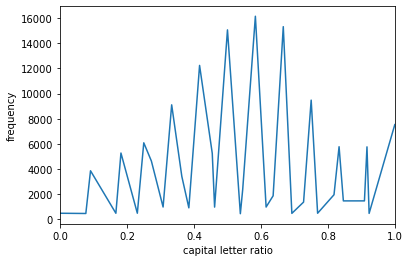

In [25]:
unique, counts = np.unique([x[7] for x in features], return_counts=True)
plt.plot(unique, counts)
plt.xlabel("capital letter ratio")
plt.xlim(0,1)
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

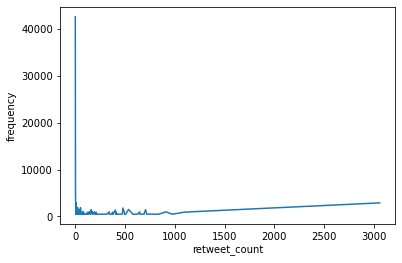

In [26]:
unique, counts = np.unique([x[8] for x in features], return_counts=True)
plt.plot(unique, counts)
plt.xlabel("retweet_count")
plt.ylabel("frequency")

In [27]:
unique, counts = np.unique([x[9] for x in features], return_counts=True)
counts

#hashtags

array([ 38922, 122711], dtype=int64)

Text(0, 0.5, 'frequency')

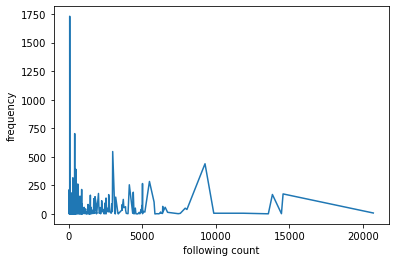

In [28]:
unique, counts = np.unique([x[10] for x in features], return_counts=True)
plt.plot(unique[1:], counts[1:])
plt.xlabel("following count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

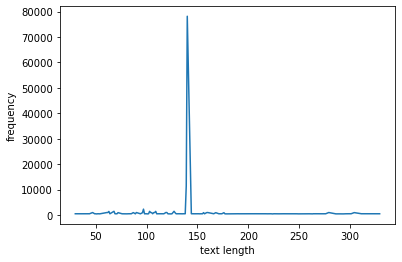

In [29]:
unique, counts = np.unique([x[11] for x in features], return_counts=True)
plt.plot(unique, counts)
plt.xlabel("text length")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

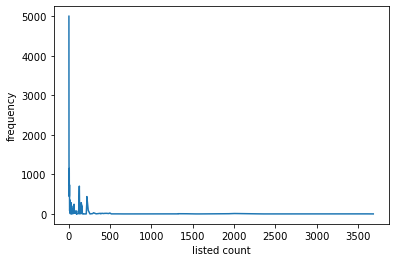

In [30]:
unique, counts = np.unique([x[12] for x in features], return_counts=True)
plt.plot(unique[1:], counts[1:])
plt.xlabel("listed count")
plt.ylabel("frequency")

In [31]:
unique, counts = np.unique([x[13] for x in features], return_counts=True)
counts

#emoticons

array([146892,  14741], dtype=int64)

Text(0, 0.5, 'frequency')

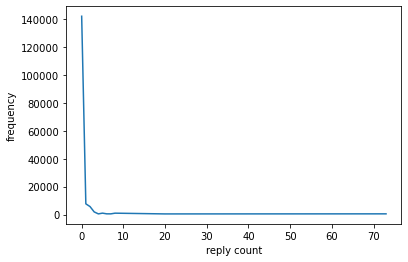

In [32]:
unique, counts = np.unique([x[14] for x in features], return_counts=True)
plt.plot(unique, counts)
plt.xlabel("reply count")
plt.ylabel("frequency")

In [33]:
unique, counts = np.unique([x[15] for x in features], return_counts=True)
counts

#quote count 

array([156390,   3845,    481,    433,    484], dtype=int64)

Text(0, 0.5, 'frequency')

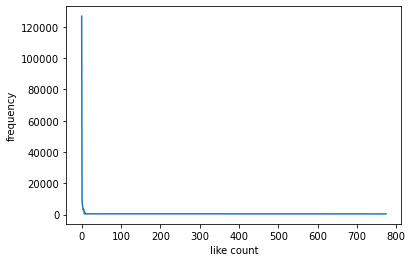

In [34]:
unique, counts = np.unique([x[16] for x in features], return_counts=True)
plt.plot(unique, counts)
plt.xlabel("like count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

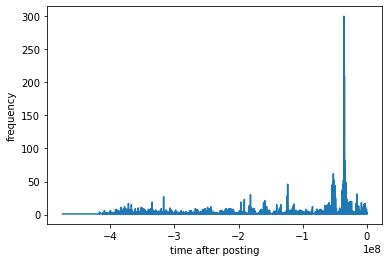

In [35]:
unique, counts = np.unique([x[17] for x in features], return_counts=True)
counts

plt.plot(unique[:-1], counts[:-1])
plt.xlabel("time after posting")
plt.ylabel("frequency")

#time after posting 

In [36]:
unique, counts = np.unique([x[18] for x in features], return_counts=True)
counts

#pos tags

C:\Users\nickv\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


array([ 487,  458,  482,  447,  492,  489,  468,  481,  437,  443,  481,
        485,  460,  492,  470,  491,  487,  480,  484,  487,  485,  491,
        473,  492,  450,  477,  488,  487,  496,  498,  441,  498,  490,
        495,  452,  487,  475,  467,  438,  460,  464,  489,  486,  493,
        479,  494,  487,  479,  433,  460,  490,  488,  475,  486,  492,
        495,  492,  491,  495,  495,  493,  489,  459,  486,  445,  474,
        475,  495,  460,  478,  476,  432,  489,  491,  469,  485,  479,
        455,  449,  478,  496,  480,  496,  492,  479,  486,  428,  487,
        486,  447,  491,  490,  478,  409,  489,  481,  489,  492,  488,
        488,  444,  479,  480,  495,  475,  497,  476,  491,  457,  494,
        446,  481,  466,  495,  456,  460,  482,  437,  487,  432,  472,
        443,  479,  416,  949,  486,  483,  499,  498,  489,  496,  483,
        490,  481,  500,  480,  977,  497,  490,  484,  407,  497,  494,
        488,  499,  494,  879,  485,  481,  486,  4

In [37]:
unique, counts = np.unique([x[19] for x in features], return_counts=True)
counts

#activity

array([53,  8, 13, ...,  5,  1,  2], dtype=int64)

In [38]:
unique, counts = np.unique([x[20] for x in features], return_counts=True)
counts

#has profile pic 

array([144719,  16914], dtype=int64)

In [39]:
unique, counts = np.unique([x[21] for x in features], return_counts=True)
print(unique)
print(counts)

#fpp

[1]
[161633]


In [40]:
unique, counts = np.unique([x[22] for x in features], return_counts=True)
counts

#possibly sensitive

array([160672,    961], dtype=int64)

In [41]:
len([x[0] for x in features])

161633

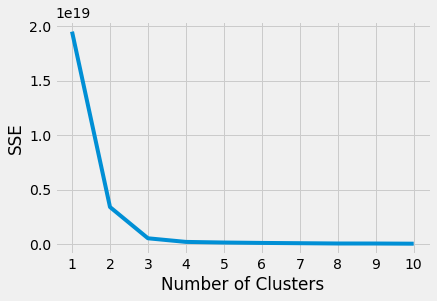

In [42]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs )
    kmeans.fit([x[0:17] for x in features])
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [43]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

scaled_features = [x[0:17] for x in features]

kmeans = KMeans(n_clusters=3, **kmeans_kwargs )
labels = kmeans.fit_predict(scaled_features)

In [44]:
np.count_nonzero(labels == 1)

31667

In [45]:
np.count_nonzero(labels == 2)

83432

In [46]:
np.count_nonzero(labels == 0)

46534

In [47]:
len(labels)

161633

Text(0, 0.5, 'Tweets')

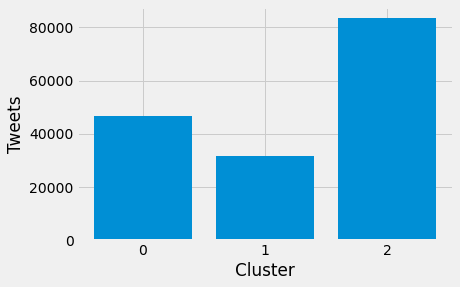

In [48]:
plt.style.use("fivethirtyeight")
plt.bar([0,1,2], [46534,31667,83432])
plt.xticks([0,1,2])
plt.xlabel("Cluster")
plt.ylabel("Tweets")

In [49]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

scaled_features = [x[0:17] for x in features]

kmeans = KMeans(n_clusters=2, **kmeans_kwargs )
labels = kmeans.fit_predict(scaled_features)


Text(0.5, 1.0, '#jinek')

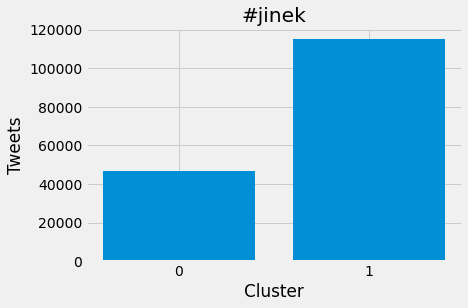

In [50]:
plt.style.use("fivethirtyeight")
zeros = np.count_nonzero(labels == 0)
ones = np.count_nonzero(labels == 1)
plt.bar([0,1], [zeros,ones])
plt.xticks([0,1])
plt.xlabel("Cluster")
plt.ylabel("Tweets")
plt.title("#jinek")

In [51]:
import html
import re
from nltk.stem import WordNetLemmatizer
def function_clean_tweet(text):
    # Escaping HTML characters
    text = html.unescape(text)
    text = str(text)
    # Removal of URLs (three-parter because the word tokenizer splits URLs like that)
    text = re.sub("https", "", text)
    text = re.sub(":", "", text)
    text = re.sub("//[^\s]*", "", text)
    # Removal of mentions
    text = re.sub("@[^\s]*", "", text)
    # Removal of hashtags
    text = re.sub("#[^\s]*", "", text)
    # Convert to lowercase
    text = text.lower()
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [52]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
stop_words = set(stopwords.words('dutch'))
stop_words.add("jinek")
stop_words.add("jinek_rtl")
stop_words.add("we")
stop_words.add("op1")
stop_words.add("rtl")

tweet_texts = [x[0]["text"] for x in data2]

word_tokens = [word_tokenize(text, preserve_line=False) for text in tweet_texts]
 
filtered_sentences = [[w for w in tweet if not w.lower() in stop_words] for tweet in word_tokens]

all_words = [' '.join([x for x in f]) for f in filtered_sentences]
all_words = [function_clean_tweet([text]) for text in all_words]

count_vectorizer = CountVectorizer(stop_words=stop_words)
count_data = count_vectorizer.fit_transform(all_words)

lda = LDA(n_components=5, n_jobs=-1)
lda.fit(count_data)

print("Topics found via LDA:")
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
print_topics(lda, count_vectorizer, 20)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nickv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topics found via LDA:

Topic #0:
rt weer gaat mensen staat zullen nooit mag boosterprik tafel waar alleen weet mee kaag net eelcohoecke europa oorlog kijken

Topic #1:
rt keer man zit uitzending thierrybaudet gaat hansvantelling alle gommers krijgen echt rutte terug nl gisteren duinen kust grondrechten keuze

Topic #2:
rt martijn koning man baudet eelcohoecke heel zegt no zit naast nee minpres gewoon zei go kinderen optreden steed eva

Topic #3:
rt zorg eelcohoecke rutte baudet zit rblommestijn thierrybaudet levi gedaan jarenlang druk afbraakbeleid schuld ongevaccinee onterecht echt net deel wel

Topic #4:
rt eelcohoecke mensen hoge omtzigt wel thierrybaudet gaan kuiper op1npo waar zegt weer den haag da marcelbar8 d66 zit echt


In [53]:
# import pyLDAvis
# import sklearn
# import pyLDAvis.sklearnffu
# #help(pyLDAvis)

# pyLDAvis.enable_notebook()
# pyLDAvis.sklearn.prepare(lda, count_data, count_vectorizer)

ModuleNotFoundError: No module named 'pyLDAvis.sklearnffu'

In [19]:
import time 
#text = data2[x][0]["text"]

features = []
for x in range(0,len(data)):
    temp = []
    if data[x][1] != []:
        followers_count = data[x][1][0]["public_metrics"]["followers_count"]
        temp.append(followers_count)
    else:
        temp.append(None)

    tweetcount = -1 
    if data[x][1] != []:        
        tweetcount = data[x][1][0]["public_metrics"]["tweet_count"]
        temp.append(tweetcount)
    else:
        temp.append(None)

    qmarks = "?" in data[x][0]["text"]
    temp.append(int(qmarks))

    if data[x][1] != []:
        verified = data[x][1][0]["verified"]
        temp.append(int(verified))    
    else:
        temp.append(None)
        
    accountlife = time.mktime(time.localtime()) - time.mktime(time.strptime(data[x][0]["created_at"], "%Y-%m-%dT%H:%M:%S.000Z"))
    temp.append(accountlife)

    if data[x][1] != []:    
        ratio = (data[x][1][0]["public_metrics"]["followers_count"]+1)/(data[x][1][0]["public_metrics"]["following_count"]+2)
        temp.append(ratio)
    else:
        temp.append(None)
        
    emark = "!" in data[x][0]["text"]
    temp.append(int(emark))

    capitalletters = sum(1 for c in data[x][0]["text"] if c.isupper())/sum(1 for c in data[x][0])
    temp.append(capitalletters)

    retweet_count = data[x][0]["public_metrics"]["retweet_count"]
    temp.append(retweet_count)
    
    hashtags = "#" in data[x][0]["text"]
    temp.append(int(hashtags))
    
    if data[x][1] != []:
        following = data[x][1][0]["public_metrics"]["following_count"]
        temp.append(following)
    else:
        temp.append(None)

    text_length = len(data[x][0]["text"])
    temp.append(text_length)
    
    if data[x][1] != []:    
        listed_count = data[x][1][0]["public_metrics"]["listed_count"]
        temp.append(listed_count)
    else:
        temp.append(None)

    emoticons = True in [s in UNICODE_EMOJI['en'] for s in data[x][0]["text"]]
    temp.append(int(emoticons))
    
    reply_count = data[x][0]["public_metrics"]["reply_count"]
    temp.append(reply_count)
    
    quote_count = data[x][0]["public_metrics"]["quote_count"]
    temp.append(quote_count)
    
    like_count = data[x][0]["public_metrics"]["like_count"]
    temp.append(like_count)
    
    if data[x][1] != []:
        timeafterposting = time.mktime(time.strptime(data[x][1][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z")) - time.mktime(time.strptime(data[x][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z"))
        temp.append(timeafterposting)
    else:
        temp.append(None)

    pos_tags = nltk.pos_tag(nltk.word_tokenize(data[x][0]["text"]))
    temp.append(pos_tags)
    
    activity = tweetcount/accountlife
    temp.append(activity)

    if data[x][1] != []:
        has_url = "profile_image_url" in data[x][1][0]
        temp.append(int(has_url))
    else:
        temp.append(None)
        
    fpp = True in [i in data[x][0]["text"].lower() for i in ["me", "my", "i", "mine"]]
    temp.append(int(fpp))

    nsfw = data[x][0]["possibly_sensitive"] 
    temp.append(int(nsfw))
    features.append(temp)

NameError: name 'data' is not defined

In [33]:
np.array(features, dtype=object).shape

columns = ["followers",
          "tweet_count",
          "question_marks",
          "verified",
          "accountlife",
          "followers_count",
          "exclamation_marks",
          "capital letters",
          "retweet_count",
          "hashtags",
          "following",
          "text length",
          "listed_count",
          "emoticons",
          "reply_count",
          "quote_count",
          "like_count",
          "time_after_posting",
          "pos_tags",
          "activity",
          "has_url",
          "has_first_person_pronouns",
          "possibly_sensitive"]
df = pd.DataFrame(data=features, index=None, columns=columns)

In [34]:
df

,followers,tweet_count,question_marks,verified,accountlife,followers_count,exclamation_marks,capital letters,retweet_count,hashtags,...,emoticons,reply_count,quote_count,like_count,time_after_posting,pos_tags,activity,has_url,has_first_person_pronouns,possibly_sensitive
0,1744,133308,0,0,8531787.0,0.782511,1,0.666667,19,1,...,0,0,0,0,-257208698.0,"[(RT, NNP), (@, NNP), (EelcoHoecke, NNP), (:, ...",0.015625,1,1,0
1,-1,-1,0,-1,8531787.0,999999.000000,1,0.666667,19,1,...,0,0,0,0,999999.0,"[(RT, NNP), (@, NNP), (EelcoHoecke, NNP), (:, ...",0.015625,-1,1,0
2,30,5063,0,0,8531787.0,1.240000,1,0.666667,19,1,...,0,0,0,0,-275062400.0,"[(RT, NNP), (@, NNP), (EelcoHoecke, NNP), (:, ...",0.000593,1,1,0
3,391,714,0,0,8531787.0,0.370861,1,0.666667,19,1,...,0,0,0,0,-6109167.0,"[(RT, NNP), (@, NNP), (EelcoHoecke, NNP), (:, ...",0.000084,1,1,0
4,191,25391,0,0,8531787.0,2.370370,1,0.666667,19,1,...,0,0,0,0,-105147125.0,"[(RT, NNP), (@, NNP), (EelcoHoecke, NNP), (:, ...",0.002976,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161628,-1,-1,0,-1,40669615.0,999999.000000,1,0.750000,121,0,...,0,0,0,0,999999.0,"[(RT, NNP), (@, NNP), (Erwin3e, NNP), (:, :), ...",0.002134,-1,1,0
161629,-1,-1,0,-1,40669615.0,999999.000000,1,0.750000,121,0,...,0,0,0,0,999999.0,"[(RT, NNP), (@, NNP), (Erwin3e, NNP), (:, :), ...",0.002134,-1,1,0
161630,-1,-1,0,-1,40669615.0,999999.000000,1,0.750000,121,0,...,0,0,0,0,999999.0,"[(RT, NNP), (@, NNP), (Erwin3e, NNP), (:, :), ...",0.002134,-1,1,0
161631,-1,-1,0,-1,40669615.0,999999.000000,1,0.750000,121,0,...,0,0,0,0,999999.0,"[(RT, NNP), (@, NNP), (Erwin3e, NNP), (:, :), ...",0.002134,-1,1,0


In [35]:
df.describe()

,followers,tweet_count,question_marks,verified,accountlife,followers_count,exclamation_marks,capital letters,retweet_count,hashtags,...,listed_count,emoticons,reply_count,quote_count,like_count,time_after_posting,activity,has_url,has_first_person_pronouns,possibly_sensitive
count,161633.000000,161633.000000,161633.000000,161633.000000,1.616330e+05,161633.000000,161633.000000,161633.000000,161633.000000,161633.000000,...,161633.000000,161633.000000,161633.000000,161633.000000,161633.000000,1.616330e+05,1.616330e+05,161633.000000,161633.0,161633.000000
mean,554.266623,12096.145199,0.131539,-0.894687,2.462373e+07,895355.921223,0.158897,0.647748,188.241597,0.759195,...,3.220221,0.091200,0.553643,0.106315,4.351735,-1.773270e+07,5.989326e-03,-0.790711,1.0,0.005946
std,7162.297957,70629.906060,0.337990,0.309126,1.098329e+07,306091.640702,0.365581,0.384170,450.747369,0.427573,...,40.038852,0.287895,4.225030,1.184351,43.697955,6.943488e+07,1.031468e-02,0.612191,0.0,0.076878
min,-1.000000,-1.000000,0.000000,-1.000000,8.531787e+06,0.004149,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,-4.740775e+08,4.850550e-07,-1.000000,1.0,0.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,1.884795e+07,999999.000000,0.000000,0.416667,0.000000,1.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,9.999990e+05,7.694501e-04,-1.000000,1.0,0.000000
50%,-1.000000,-1.000000,0.000000,-1.000000,2.100541e+07,999999.000000,0.000000,0.583333,23.000000,1.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,9.999990e+05,2.014465e-03,-1.000000,1.0,0.000000
75%,-1.000000,-1.000000,0.000000,-1.000000,4.015112e+07,999999.000000,0.000000,0.833333,175.000000,1.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,9.999990e+05,5.813276e-03,-1.000000,1.0,0.000000
max,771137.000000,988507.000000,1.000000,1.000000,4.066962e+07,999999.000000,1.000000,3.166667,3056.000000,1.000000,...,3686.000000,1.000000,73.000000,21.000000,774.000000,9.999990e+05,9.382254e-02,1.000000,1.0,1.000000


<AxesSubplot:>

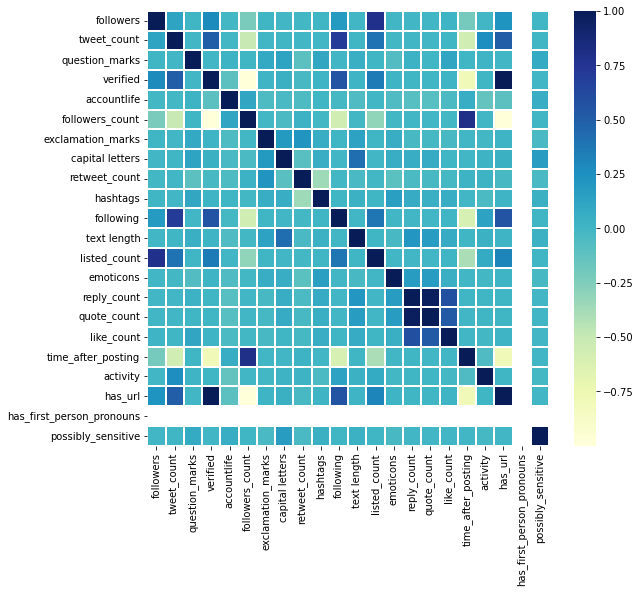

In [36]:
import seaborn as sns

corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)